<a href="https://colab.research.google.com/github/IshaqKassam/AI-networkx-matplotlib/blob/main/BestFirstSearchQuestion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

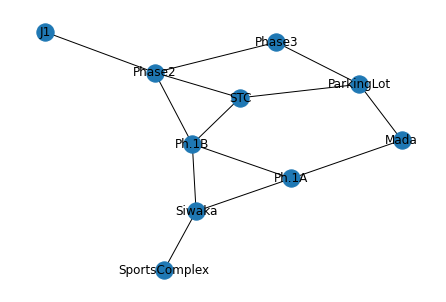

In [ ]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

g = nx.Graph()

g.add_edge("SportsComplex", "Siwaka")
g.add_edge("Siwaka", "Ph.1A")
g.add_edge("Siwaka", "Ph.1B")
g.add_edge("Ph.1A", "Ph.1B")
g.add_edge("Ph.1A", "Mada")

g.add_edge("Ph.1B", "Phase2")
g.add_edge("Ph.1B", "STC")
g.add_edge("STC", "Phase2")

g.add_edge("Phase2", "Phase3")
g.add_edge("Phase2", "J1")
g.add_edge("Phase3", "ParkingLot")
g.add_edge("STC", "ParkingLot")

g.add_edge("Mada", "ParkingLot")



# drawing in circular layout
nx.draw(g, with_labels = True)
plt.savefig("filename1.png")


In [29]:
# This class represent a graph
class Graph:
    # Initialize the class
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()
    # Create an undirected graph by adding symmetric edges
    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist
    # Add a link from A and B of given distance, and also add the inverse link if the graph is undirected
    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance
    # Get neighbors or a neighbor
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)
    # Return a list of nodes in the graph
    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)
# This class represent a node
class Node:
    # Initialize the class
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0 # Distance to start node
        self.h = 0 # Distance to goal node
        self.f = 0 # Total cost
    # Compare nodes
    def __eq__(self, other):
        return self.name == other.name
    # Sort nodes
    def __lt__(self, other):
         return self.f < other.f
    # Print node
    def __repr__(self):
        return ('({0},{1})'.format(self.position, self.f))
# Best-first search
def best_first_search(graph, heuristics, start, end):
    
    # Create lists for open nodes and closed nodes
    open = []
    closed = []
    # Create a start node and an goal node
    start_node = Node(start, None)
    goal_node = Node(end, None)
    # Add the start node
    open.append(start_node)
    
    # Loop until the open list is empty
    while len(open) > 0:
        # Sort the open list to get the node with the lowest cost first
        open.sort()
        # Get the node with the lowest cost
        current_node = open.pop(0)
        # Add the current node to the closed list
        closed.append(current_node)
        
        # Check if we have reached the goal, return the path
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            # Return reversed path
            return path[::-1]
        # Get neighbours
        neighbors = graph.get(current_node.name)
        # Loop neighbors
        for key, value in neighbors.items():
            # Create a neighbor node
            neighbor = Node(key, current_node)
            # Check if the neighbor is in the closed list
            if(neighbor in closed):
                continue
            # Calculate cost to goal
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.h
            # Check if neighbor is in open list and if it has a lower f value
            if(add_to_open(open, neighbor) == True):
                # Everything is green, add neighbor to open list
                open.append(neighbor)
    # Return None, no path is found
    return None
# Check if a neighbor should be added to open list
def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f >= node.f):
            return False
    return True
# The main entry point for this module
def main():
    # Create a graph
    graph = Graph()
    # Create graph connections (Actual distance)
    graph.connect('SportsComplex', 'Siwaka', 450)
    graph.connect('Siwaka', 'Ph.1A', 10)
    graph.connect('Siwaka', 'Ph.1B', 230)
    graph.connect('Ph.1A', 'Ph.1B', 100)
    graph.connect('Ph.1A', 'Mada', 850)
    graph.connect('Ph.1B', 'Phase2', 112)
    graph.connect('Ph.1B', 'STC', 50)
    graph.connect('STC', 'Phase2', 50)
    graph.connect('Phase2', 'Phase3', 500)
    graph.connect('Phase2', 'J1', 600)
    graph.connect('Phase3', 'ParkingLot', 350)
    graph.connect('STC', 'ParkingLot', 250)
    graph.connect('Mada', 'ParkingLot', 700)
    
    # Make graph undirected, create symmetric connections
    graph.make_undirected()
    # Create heuristics (straight-line distance, air-travel distance)
    heuristics = {}
    heuristics['SportsComplex'] = 730
    heuristics['Siwaka'] = 405
    heuristics['Ph.1A'] = 380
    heuristics['Ph.1B'] = 280
    heuristics['STC'] = 213
    heuristics['Phase2'] = 210
    heuristics['J1'] = 500
    heuristics['Phase3'] = 160
    heuristics['Mada'] = 630
    heuristics['ParkingLot'] = 0
    # Run search algorithm
    path = best_first_search(graph, heuristics, 'SportsComplex', 'ParkingLot')
    print(path)
    print()
# Tell python to run main method
if __name__ == "__main__": main()

['SportsComplex: 0', 'Siwaka: 450', 'Ph.1B: 680', 'Phase2: 792', 'Phase3: 1292', 'ParkingLot: 1642']

